# 参考文献

In [87]:
# https://thinkingneuron.com/boston-housing-price-prediction-case-study-in-python/


# Exploratory Data Analysis on Boston Housing Dataset

In [88]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [89]:
# Reading the dataset

BostonData=pd.read_csv('./BostonHousingData.csv', encoding='latin')
print('Shape before deleting duplicate values:', BostonData.shape)

# Removing duplicate rows if any
BostonData=BostonData.drop_duplicates()
print('Shape After deleting duplicate values:', BostonData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BostonData.head(10)

Shape before deleting duplicate values: (506, 14)
Shape After deleting duplicate values: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# Describing the Dataset

In [90]:
from sklearn.datasets import load_boston

boston_in_sklearn = load_boston()
print("shape", boston_in_sklearn.data.shape)
print("description", boston_in_sklearn.DESCR)
print("feature_names",boston_in_sklearn.feature_names)

shape (506, 13)
description .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $

<AxesSubplot:>

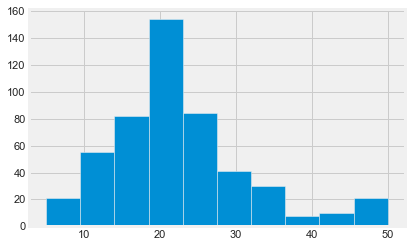

In [91]:
# Looking at the distribution of Target variable
%matplotlib inline

# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values

BostonData['MEDV'].hist()

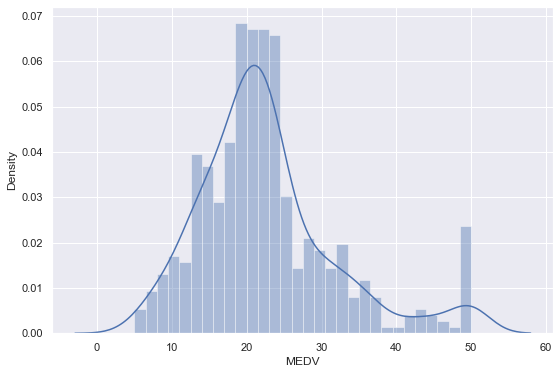

In [92]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(BostonData['MEDV'], bins=30)
plt.show()

# Basic Data Exploration

In [93]:
# Looking at sample rows in the data
BostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [94]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
BostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


# Summary Statistics

In [95]:
# Looking at the descriptive statistics of the data
BostonData.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [96]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BostonData.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

# Plotting multiple bar charts at once for categorical variables

In [97]:

# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

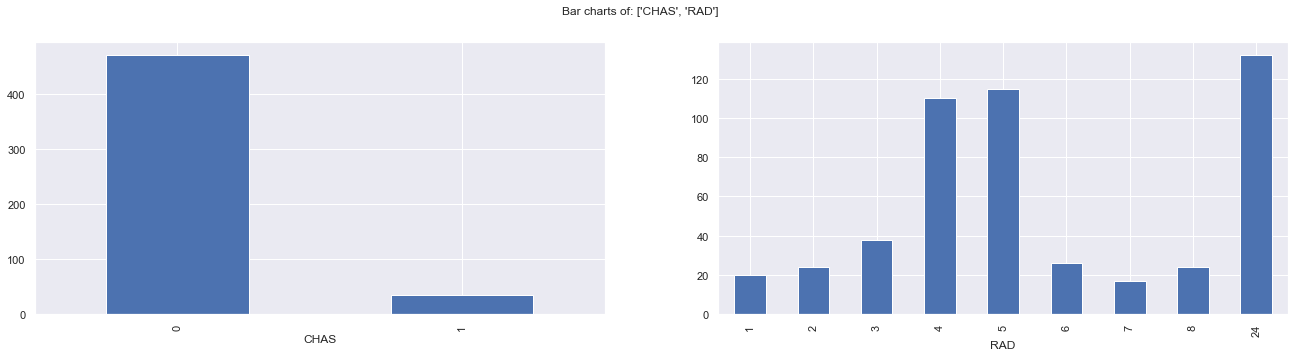

In [98]:
PlotBarCharts(inpData=BostonData, colsToPlot=['CHAS','RAD'])

# Plotting histograms of multiple columns together

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>]],
      dtype=object)

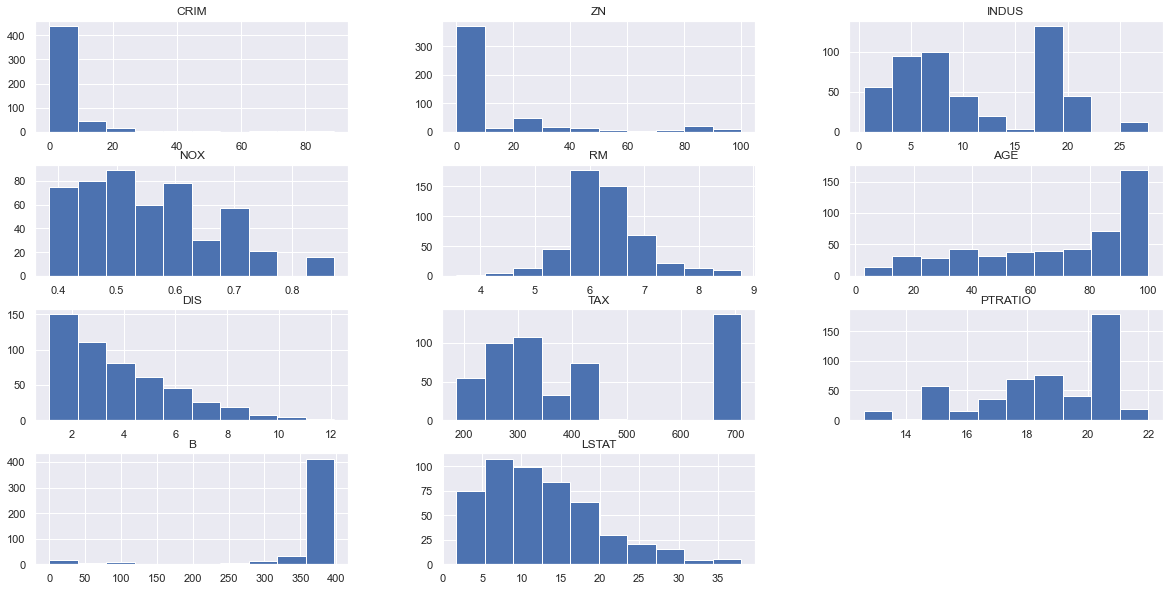

In [99]:

BostonData.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT'], figsize=(18,10))

# boxplot and outliers

In [100]:
# Finding nearest values to 60 mark
BostonData['CRIM'][BostonData['CRIM']<60].sort_values(ascending=False)

410    51.13580
414    45.74610
404    41.52920
398    38.35180
427    37.66190
         ...   
55      0.01311
341     0.01301
285     0.01096
284     0.00906
0       0.00632
Name: CRIM, Length: 503, dtype: float64

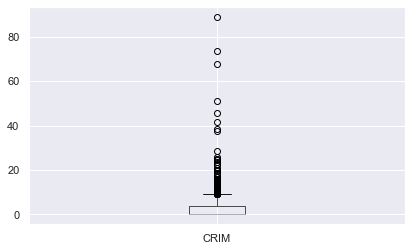

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

BostonData.boxplot(column=['CRIM'],showfliers=True)
plt.show()


In [102]:
Q1 = BostonData['CRIM'].quantile(0.25)
Q3 = BostonData['CRIM'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
uppper = Q3 + 1.5*IQR

print("lower",lower)
print("uppper",uppper)

print("min BostonData", BostonData['CRIM'].min())
print("max BostonData", BostonData['CRIM'].max())


lower -5.31051125
uppper 9.06963875
min BostonData 0.00632
max BostonData 88.9762


In [103]:
BostonData['CRIM'].sort_values(ascending=False)

380    88.97620
418    73.53410
405    67.92080
410    51.13580
414    45.74610
         ...   
55      0.01311
341     0.01301
285     0.01096
284     0.00906
0       0.00632
Name: CRIM, Length: 506, dtype: float64

In [104]:
# Replacing outliers with nearest possibe value
BostonData['CRIM'][BostonData['CRIM']>60] =51.13

array([[<AxesSubplot:title={'center':'CRIM'}>]], dtype=object)

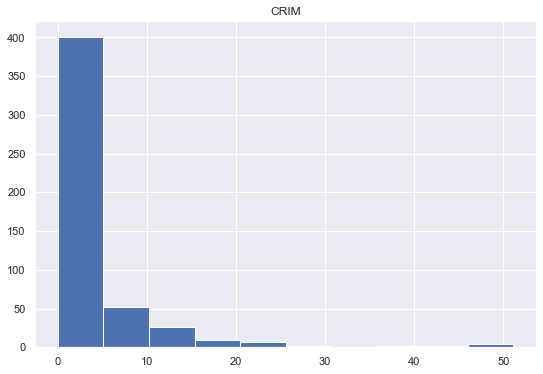

In [105]:
BostonData.hist(['CRIM'], figsize=(8,6))

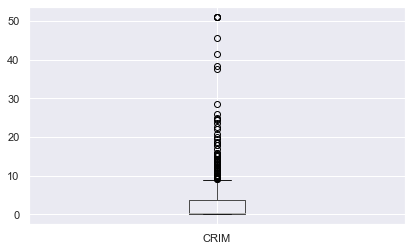

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

BostonData.boxplot(column=['CRIM'],showfliers=True)
plt.show()


In [107]:
# Finding how many missing values are there for each column
BostonData.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Relationship exploration: Categorical Vs Continuous -- Box Plots

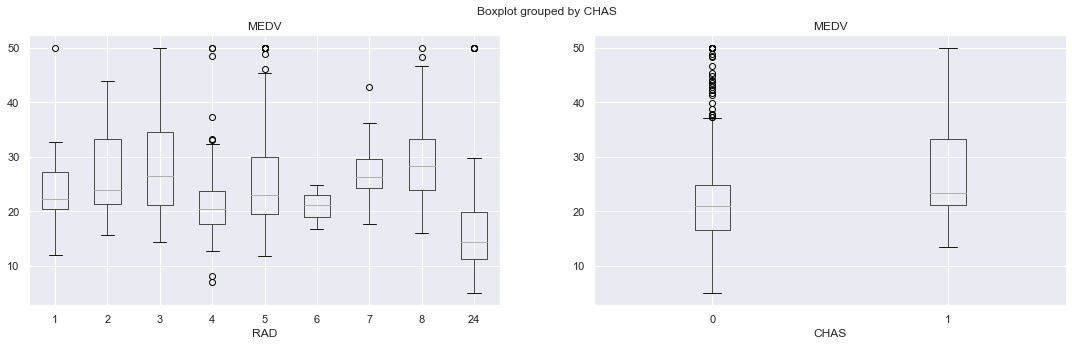

In [108]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['RAD', 'CHAS']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    BostonData.boxplot(column='MEDV', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

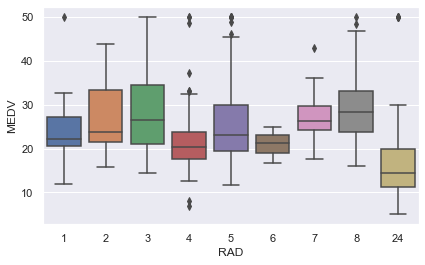

In [109]:
#类别型变量和目标变量
xx = BostonData['RAD']
yy = BostonData['MEDV']
sns.boxplot(x=xx, y=yy)
plt.show()

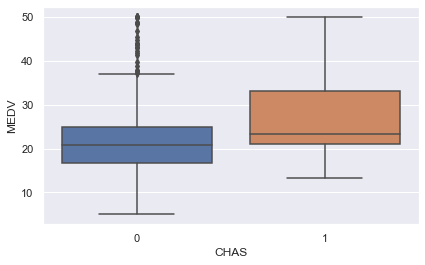

In [110]:
#类别型变量和目标变量
xx = BostonData['CHAS']
yy = BostonData['MEDV']
sns.boxplot(x=xx, y=yy)
plt.show()

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts

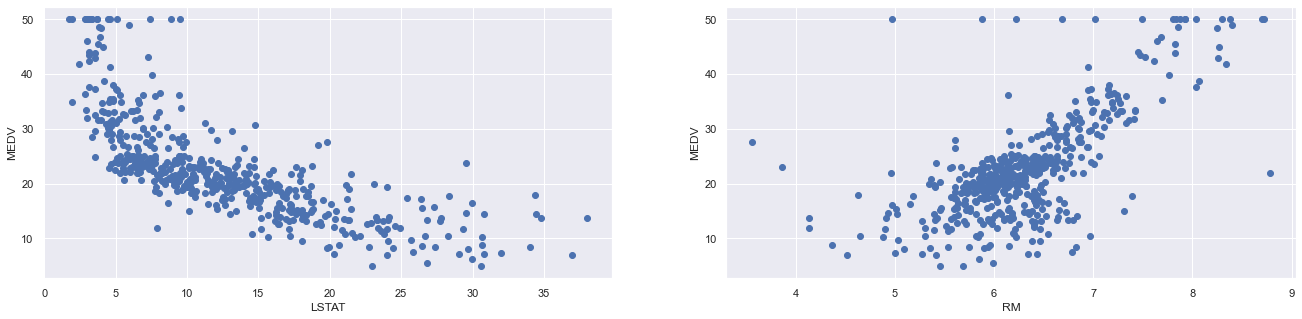

In [111]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = BostonData['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = BostonData[col]
    y = target
    plt.scatter(x, y, marker='o')
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

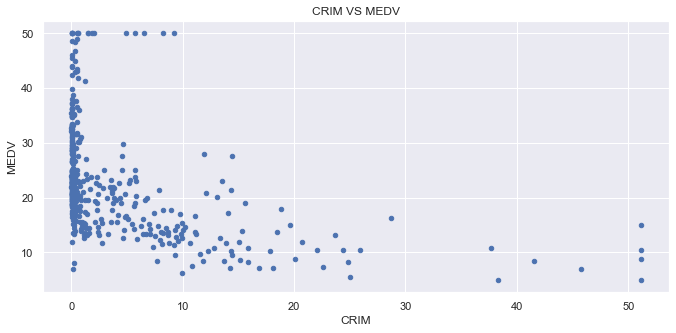

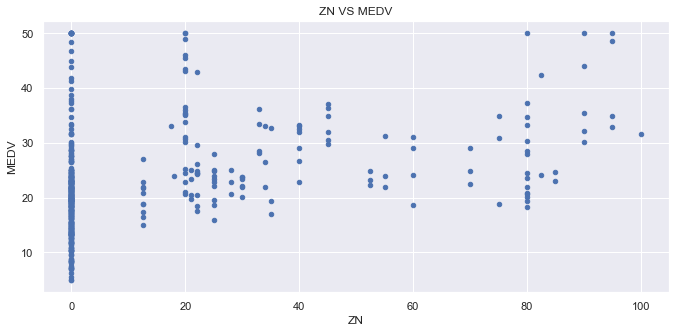

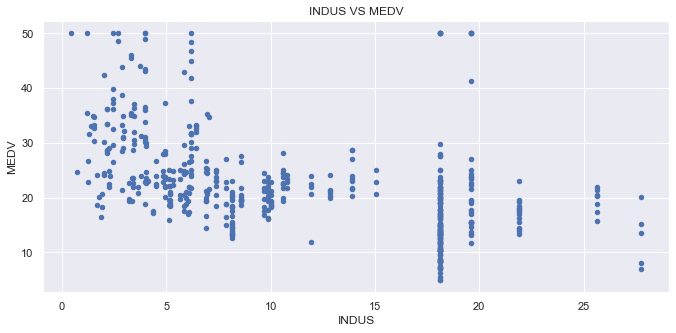

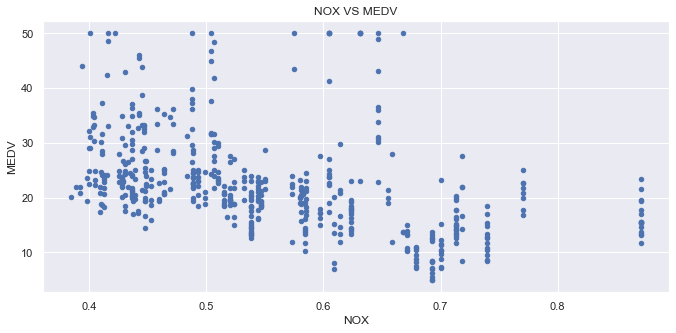

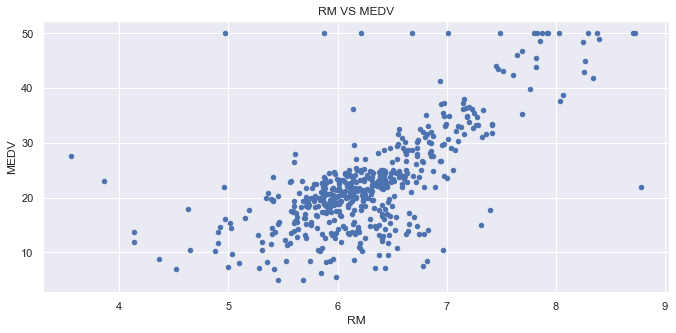

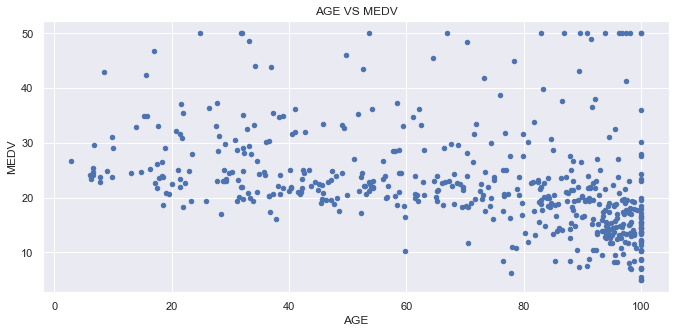

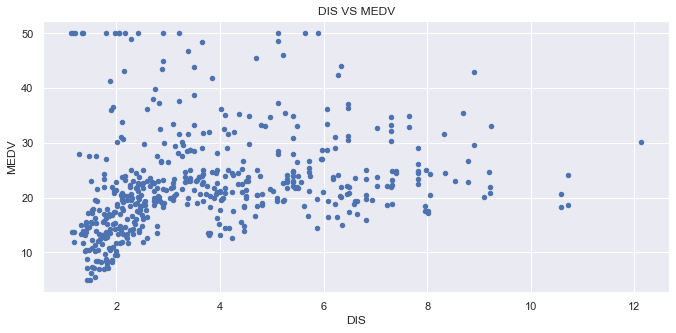

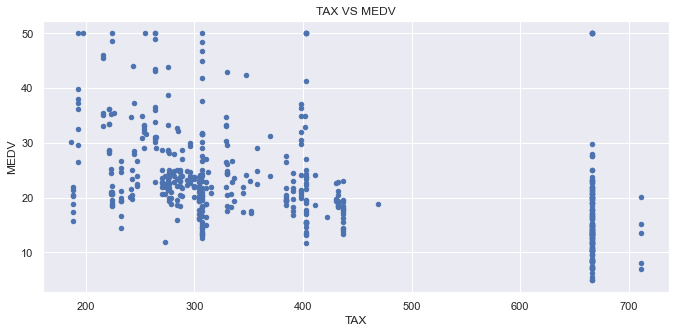

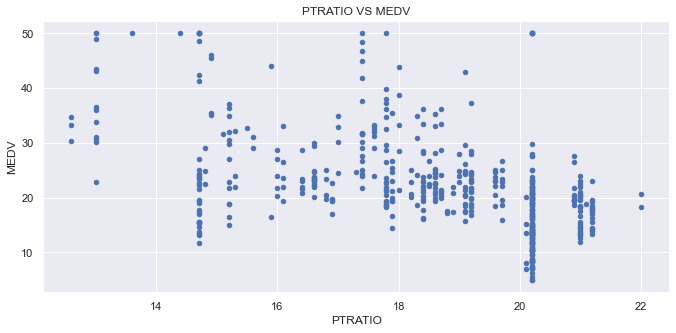

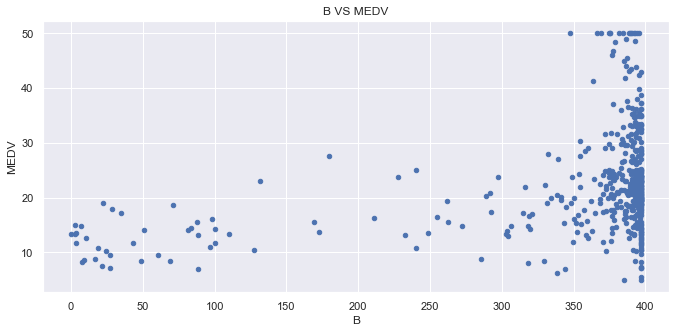

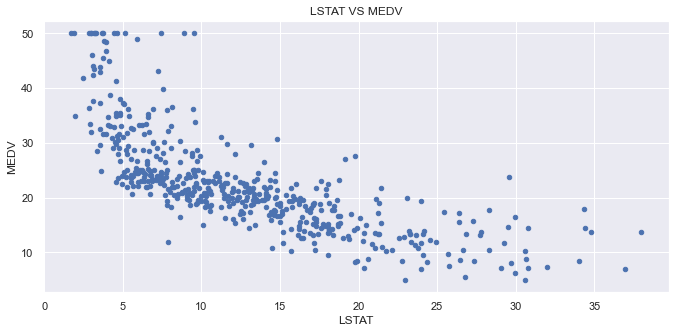

In [112]:
ContinuousCols=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    BostonData.plot.scatter(x=predictor, y='MEDV', figsize=(10,5), title=predictor+" VS "+ 'MEDV')

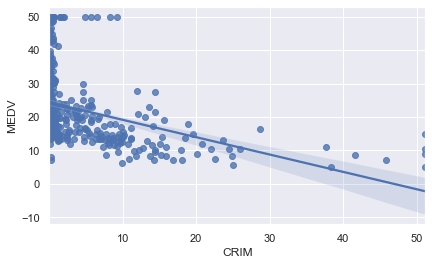

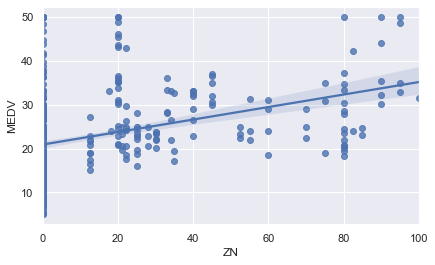

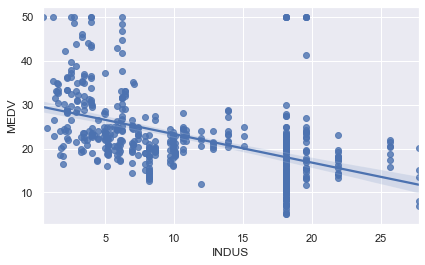

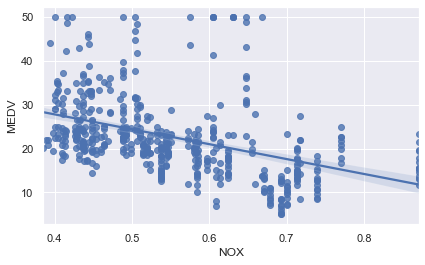

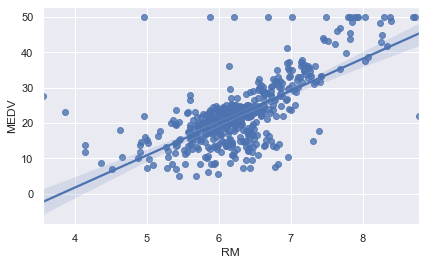

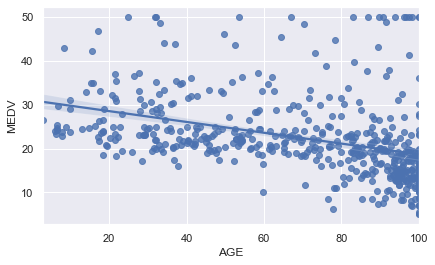

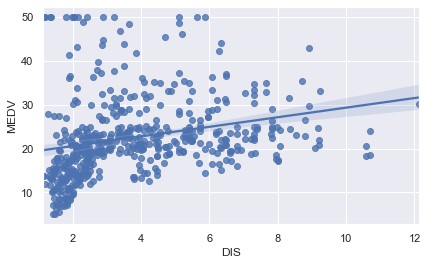

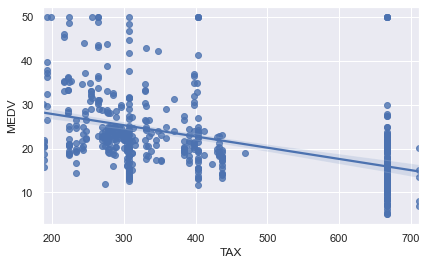

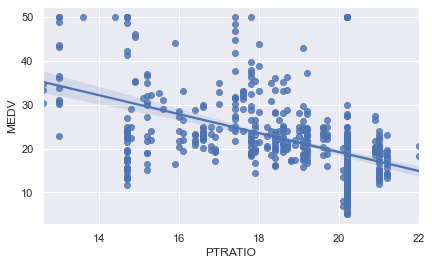

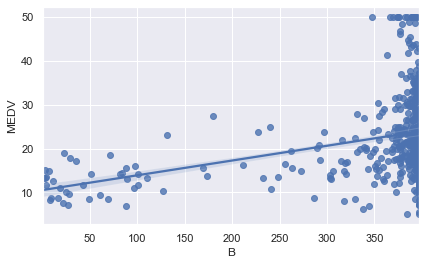

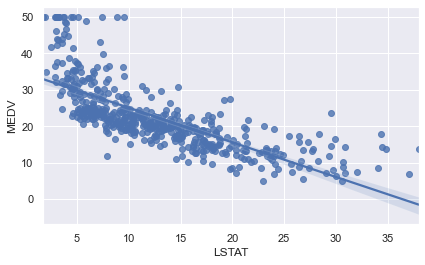

In [113]:
ContinuousCols=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']
for ccol in ContinuousCols:
    sns.regplot(x=ccol,y = 'MEDV',data = BostonData,scatter= True, fit_reg=True)
    plt.show()

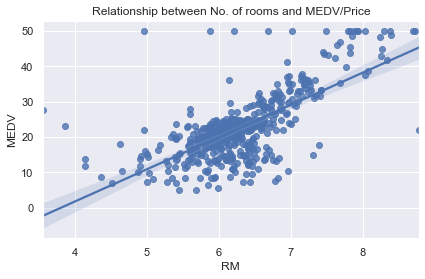

In [114]:
# Between prices and No. of rooms
sns.regplot(x="RM",y="MEDV", data=BostonData, fit_reg=True)
plt.title("Relationship between No. of rooms and MEDV/Price")
plt.show()


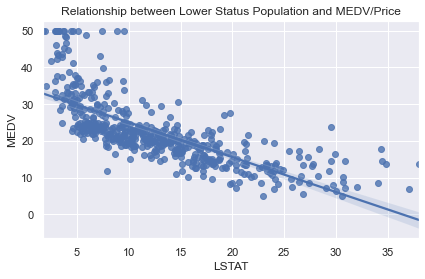

In [115]:
# Between prices and Lower Status Population
sns.regplot(x="LSTAT", y="MEDV", data=BostonData, fit_reg= True)
plt.title("Relationship between Lower Status Population and MEDV/Price")
plt.show()

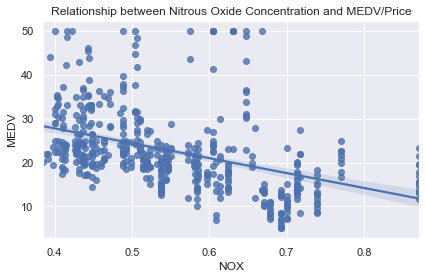

In [116]:
# Between prices and Nitrous Oxide Concentration
sns.regplot(x="NOX",  y="MEDV",data=BostonData, fit_reg= True)
plt.title("Relationship between Nitrous Oxide Concentration and MEDV/Price")
plt.show()

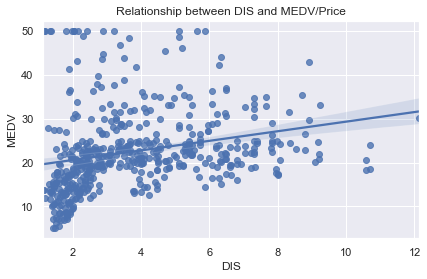

In [117]:
# Between prices and Weighted distance between 5 Boston Employment Center
sns.regplot( x="DIS", y="MEDV", data=BostonData, fit_reg= True)
plt.title("Relationship between DIS and MEDV/Price")
plt.show()

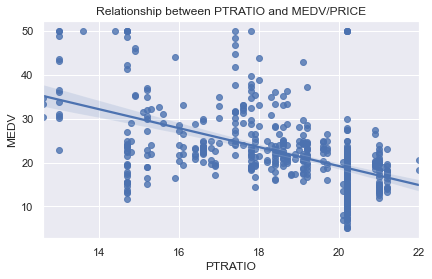

In [118]:
# Between prices and Pupil-Teacher ratio by town
sns.regplot( x="PTRATIO",y="MEDV", data=BostonData, fit_reg= True)
plt.title("Relationship between PTRATIO and MEDV/PRICE")
plt.show()

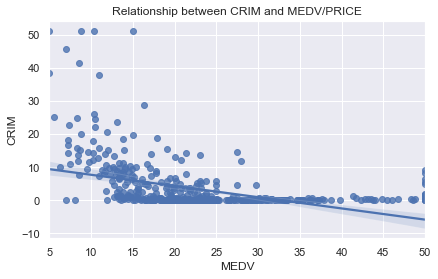

In [119]:
# Between prices and per capita crime rate by town
sns.regplot(y="CRIM",x="MEDV", data=BostonData, fit_reg= True)
plt.title("Relationship between CRIM and MEDV/PRICE")
plt.show()

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

In [120]:
# Calculating correlation matrix
ContinuousCols=['MEDV','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

# Creating the correlation matrix
CorrelationData=BostonData[ContinuousCols].corr()
CorrelationData

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.419265,0.360445,-0.483725,-0.427321,0.695360,-0.376955,0.249929,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.419265,1.000000,-0.222332,0.450375,0.466020,-0.257310,0.388784,-0.417941,0.643998,0.319489,-0.429858,0.508483
ZN,0.360445,-0.222332,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.450375,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800
NOX,-0.427321,0.466020,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.257310,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.388784,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.417941,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996
TAX,-0.468536,0.643998,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993
PTRATIO,-0.507787,0.319489,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044


In [121]:
# Filtering only those columns where absolute correlation > 0.45with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['MEDV'][abs(CorrelationData['MEDV']) > 0.45]

MEDV       1.000000
INDUS     -0.483725
RM         0.695360
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

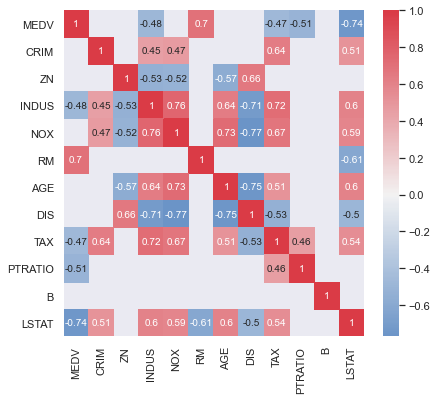

In [122]:
df2 = BostonData[ContinuousCols]
cor_matrix = df2.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(6,6));
kot = cor_matrix[abs(cor_matrix)>=.45]
sns.heatmap(kot, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()


# Selecting final predictors for Machine Learning

In [123]:
SelectedColumns=['INDUS', 'RM', 'TAX', 'PTRATIO','LSTAT', 'RAD', 'CHAS'] #后面两个是distinct values较少的字段


# Selecting final columns
DataForML=BostonData[SelectedColumns]
DataForML.head()

,INDUS,RM,TAX,PTRATIO,LSTAT,RAD,CHAS
0,2.31,6.575,296,15.3,4.98,1,0
1,7.07,6.421,242,17.8,9.14,2,0
2,7.07,7.185,242,17.8,4.03,2,0
3,2.18,6.998,222,18.7,2.94,3,0
4,2.18,7.147,222,18.7,5.33,3,0


In [124]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Data Pre-processing for Machine Learning

In [125]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['MEDV']=BostonData['MEDV']

# Printing sample rows
DataForML_Numeric.head()

,INDUS,RM,TAX,PTRATIO,LSTAT,RAD,CHAS,MEDV
0,2.31,6.575,296,15.3,4.98,1,0,24.0
1,7.07,6.421,242,17.8,9.14,2,0,21.6
2,7.07,7.185,242,17.8,4.03,2,0,34.7
3,2.18,6.998,222,18.7,2.94,3,0,33.4
4,2.18,7.147,222,18.7,5.33,3,0,36.2


# Machine Learning: Splitting the data into Training and Testing sample

In [126]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS', 'MEDV'], dtype='object')

In [127]:
# Separate Target Variable and Predictor Variables
TargetVariable= 'MEDV'
Predictors=['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'RAD', 'CHAS']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)


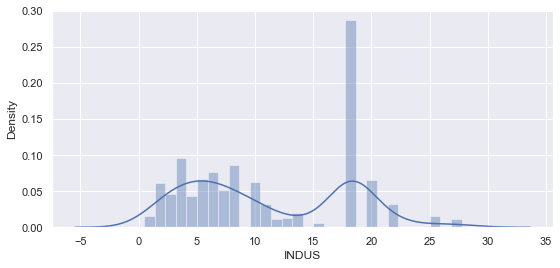

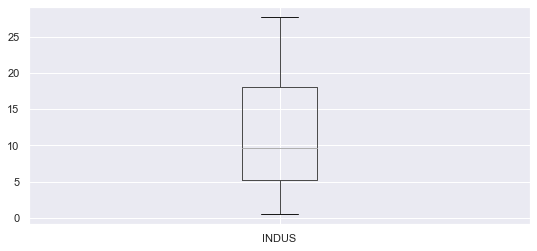

In [128]:
sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(BostonData['INDUS'], bins=30)
plt.show()

BostonData.boxplot(column=['INDUS'],showfliers=True)
plt.show()

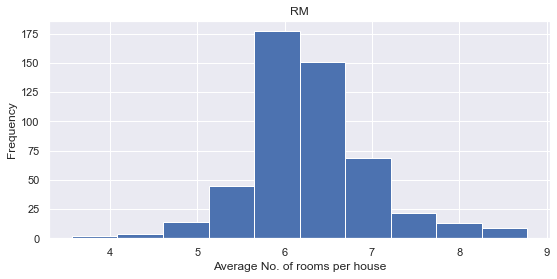

In [129]:
plt.hist(BostonData['RM'])
plt.xlabel("Average No. of rooms per house")
plt.ylabel("Frequency")
plt.title("RM")
plt.show()


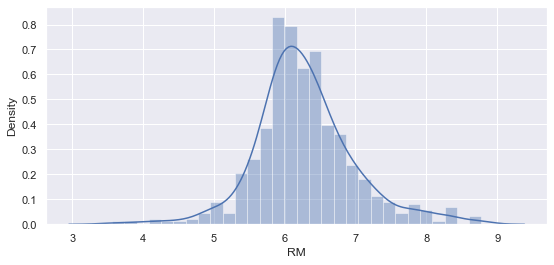

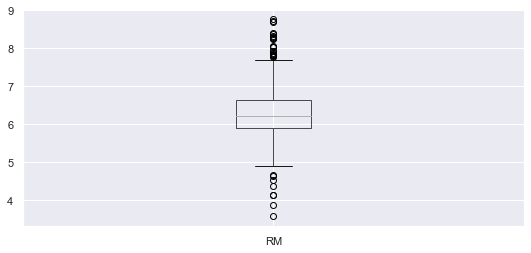

In [130]:
sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(BostonData['RM'], bins=30)
plt.show()

BostonData.boxplot(column=['RM'],showfliers=True)
plt.show()

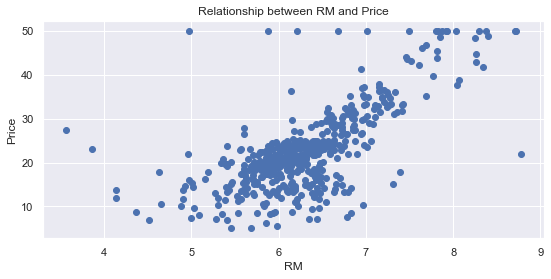

In [131]:
RM = BostonData['RM']
plt.scatter(RM ,  BostonData['MEDV'])
plt.xlabel("RM")
plt.ylabel("Price")
plt.title("Relationship between RM and Price")
plt.show()

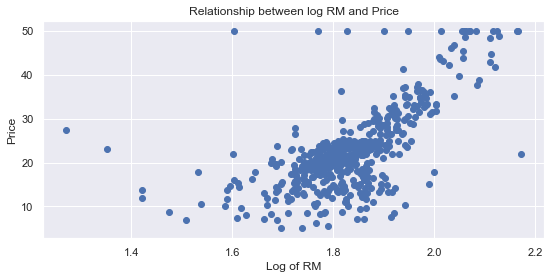

In [132]:
adj_RM = np.log(BostonData['RM'])
plt.scatter(adj_RM , BostonData['MEDV'])
plt.xlabel("Log of RM")
plt.ylabel("Price")
plt.title("Relationship between log RM and Price")
plt.show()

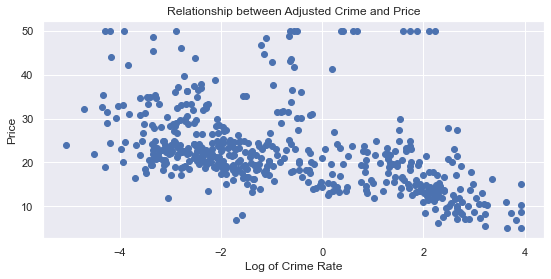

In [133]:
adj_CRIM = np.log(BostonData['CRIM'] )
plt.scatter(adj_CRIM , BostonData['MEDV'])
plt.xlabel("Log of Crime Rate")
plt.ylabel("Price")
plt.title("Relationship between Adjusted Crime and Price")
plt.show()

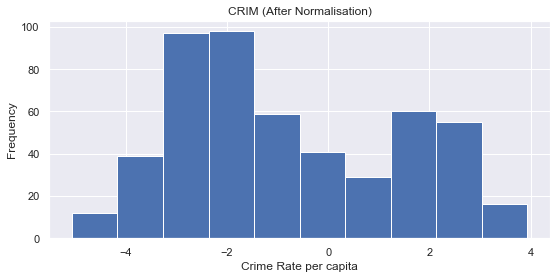

In [134]:
plt.hist(adj_CRIM)
plt.xlabel("Crime Rate per capita")
plt.ylabel("Frequency")
plt.title("CRIM (After Normalisation)")
plt.show()


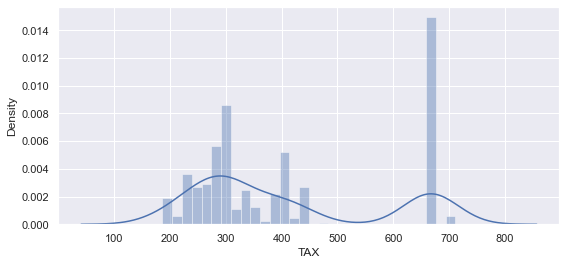

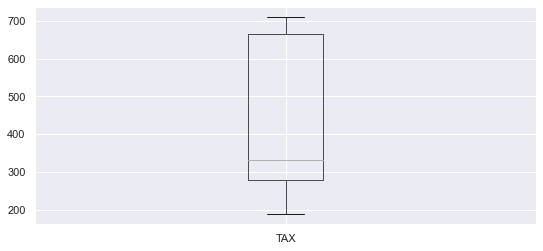

In [135]:
sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(BostonData['TAX'], bins=30)
plt.show()

BostonData.boxplot(column=['TAX'],showfliers=True)
plt.show()

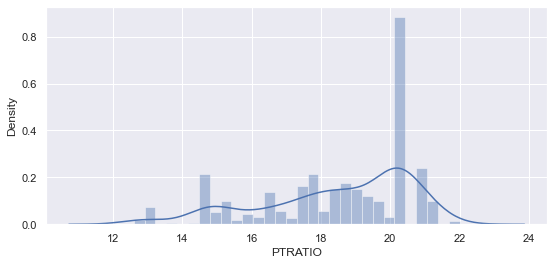

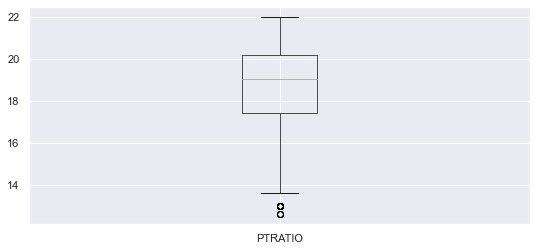

In [136]:

sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(BostonData['PTRATIO'], bins=30)
plt.show()

BostonData.boxplot(column=['PTRATIO'],showfliers=True)
plt.show()

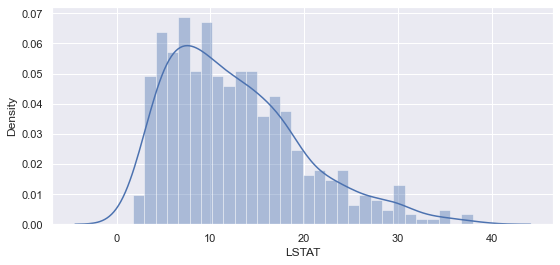

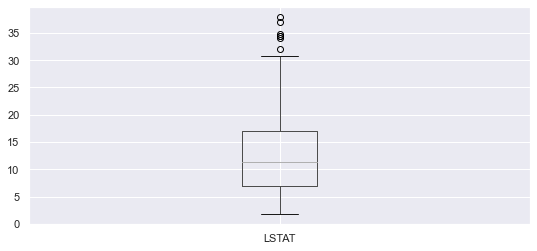

In [137]:
sns.set(rc={'figure.figsize':(8,4)})
sns.distplot(BostonData['LSTAT'], bins=30)
plt.show()

BostonData.boxplot(column=['LSTAT'],showfliers=True)
plt.show()

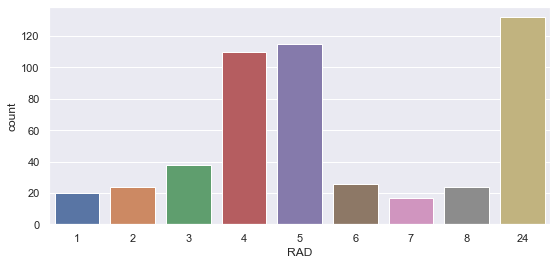

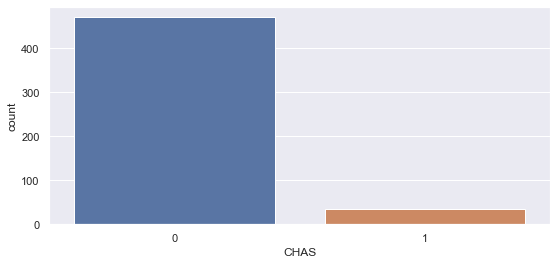

In [138]:
one_column = BostonData['RAD']
sns.countplot(one_column)
plt.show()

one_column = BostonData['CHAS']
sns.countplot(one_column)
plt.show()

In [139]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
print("X_train",X_train)
print("y_train",y_train)


X_train [[0.06304985 0.54972217 0.06679389 ... 0.09602649 0.08695652 0.        ]
 [0.35007331 0.50105384 0.46755725 ... 0.28449227 0.2173913  0.        ]
 [0.23643695 0.40639969 0.08778626 ... 0.23399558 0.08695652 0.        ]
 ...
 [0.05681818 0.58900172 0.17748092 ... 0.11754967 0.13043478 0.        ]
 [0.64662757 0.58785208 0.91412214 ... 0.59437086 1.         0.        ]
 [0.29692082 0.54493198 0.3759542  ... 0.24558499 0.17391304 0.        ]]
y_train [28.7 21.2 19.3 23.1 19.1 25.  33.4  5.  29.6 18.7 21.7 23.1 22.8 21.
 48.8 14.6 16.6 27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4 24.4
 11.8 13.8 12.3 17.8 33.1 26.7 13.4 14.4 50.  22.  19.9 23.8 17.5 12.7
  5.6 31.1 26.2 19.4 16.7 13.8 22.9 15.3 27.5 36.1 22.9 24.5 25.  50.
 34.9 31.7 24.1 22.1 14.1 42.8 19.3 32.2 26.4 21.8 21.7  8.3 46.7 43.1
 31.5 10.5 16.7 20.  33.3 17.8 50.  20.5 23.2 13.1 19.6 22.8 28.7 30.7
 22.9 21.9 23.9 32.7 24.3 21.5 24.6  8.5 26.4 23.1 15.   8.8 19.3 23.9
 24.7 19.8 23.8 13.3 29.  27.1 34.6 13.3 15.6

In [141]:
# Sanity check for the sampled data
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)


X_train shape (354, 7)
y_train shape (354,)
X_test shape (152, 7)
y_test shape (152,)


# Multiple Linear Regression(selected features)

In [142]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# predict on test
prediction=LREG.predict(X_test)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [143]:
# displaying the coefficients of parameters  
print("Coefficients: \n", LREG.coef_)

# displaying the R-squared score
print(LREG.score(X_test , y_test ))

Coefficients: 
 [  1.96072924  22.36394773  -4.72023781  -7.87853375 -21.97669623
   2.77462084   3.88715179]
0.6620424137002677


In [144]:
import sklearn
# generating the mean squared error
mse = sklearn.metrics.mean_squared_error(y_test, prediction)
mse

25.182265925837623

In [145]:
# Measuring Goodness of fit in Training data
rmse = np.sqrt(mean_squared_error(y_train, LREG.predict(X_train)))
print("RMSE train",rmse)
print('R2 train',metrics.r2_score(y_train, LREG.predict(X_train)))
print("train score", LREG.score(X_train , y_train))

print("")
rmse = np.sqrt(mean_squared_error(y_test, LREG.predict(X_test)))
print("RMSE test",rmse)
print('R2 test',metrics.r2_score(y_test, LREG.predict(X_test)))
print("test score", LREG.score(X_test , y_test))# displaying the R-squared score

RMSE train 5.124001488669868
R2 train 0.7012920597543415
train score 0.7012920597543415

RMSE test 5.018193492267673
R2 test 0.6620424137002677
test score 0.6620424137002677


## the R-squared value is 0.7013 which basically means that approximately 70% of the total variance in the price can be determined by the current regression model 

In [146]:
from sklearn import metrics
# displaying the coefficients of parameters  
print("Coefficients", LREG.coef_)
print("Intercept", LREG.intercept_)


Coefficients [  1.96072924  22.36394773  -4.72023781  -7.87853375 -21.97669623
   2.77462084   3.88715179]
Intercept 22.322823108844435


# Fitting Linear Regrssion using Statsmodels

In [147]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [148]:
DataForML_Numeric.head()


,INDUS,RM,TAX,PTRATIO,LSTAT,RAD,CHAS,MEDV
0,2.31,6.575,296,15.3,4.98,1,0,24.0
1,7.07,6.421,242,17.8,9.14,2,0,21.6
2,7.07,7.185,242,17.8,4.03,2,0,34.7
3,2.18,6.998,222,18.7,2.94,3,0,33.4
4,2.18,7.147,222,18.7,5.33,3,0,36.2


In [149]:
m = ols('MEDV ~ INDUS+RM+TAX+PTRATIO+LSTAT+RAD+CHAS ', DataForML_Numeric).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     162.0
Date:                Mon, 14 Feb 2022   Prob (F-statistic):          5.44e-124
Time:                        20:12:40   Log-Likelihood:                -1540.0
No. Observations:                 506   AIC:                             3096.
Df Residuals:                     498   BIC:                             3130.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.9656      4.190      5.243      0.0

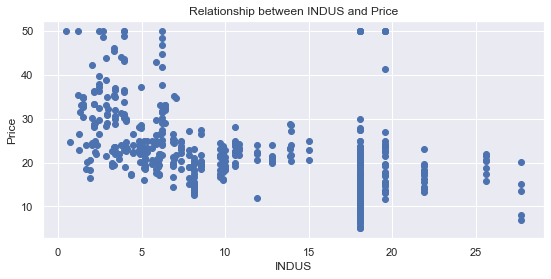

In [150]:
RM = BostonData['INDUS']
plt.scatter(RM ,  BostonData['MEDV'])
plt.xlabel("INDUS")
plt.ylabel("Price")
plt.title("Relationship between INDUS and Price")
plt.show()

# scatter of actual price vs predicted price on test

<AxesSubplot:ylabel='Density'>

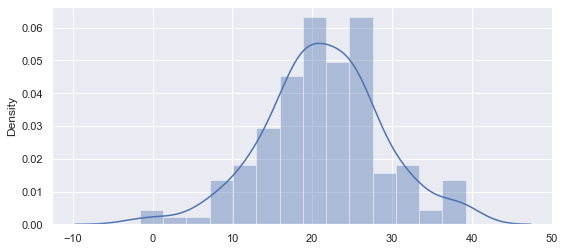

In [151]:
y_predict = LREG.predict(X_test)
sns.distplot(y_predict)

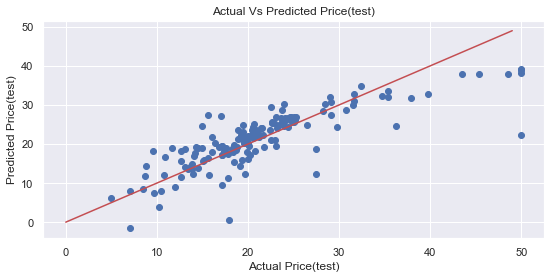

In [152]:

plt.scatter(  y_test , y_predict)

ypoints = np.arange(50)
plt.plot(ypoints, color = 'r')

plt.xlabel("Actual Price(test)")
plt.ylabel("Predicted Price(test)")
plt.title("Actual Vs Predicted Price(test)")
plt.show()

# residuals (train vs test)

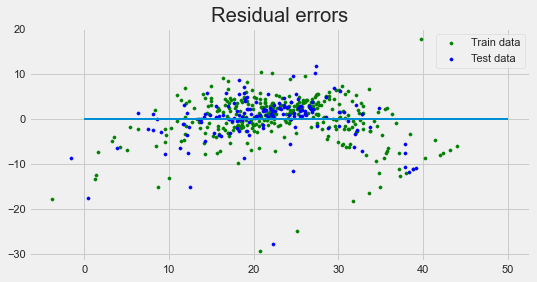

In [153]:
plt.style.use('fivethirtyeight') 
# plotting residual errors in training data 
plt.scatter(LREG.predict(X_train), LREG.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
# plotting residual errors in test data 
plt.scatter(LREG.predict(X_test), LREG.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
# plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show()


# error distribution 

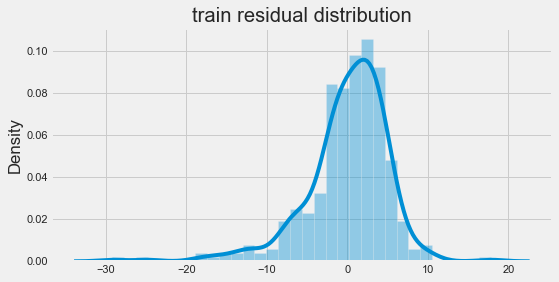

In [154]:
sns.distplot(LREG.predict(X_train)-y_train)
plt.title("train residual distribution")
plt.show()

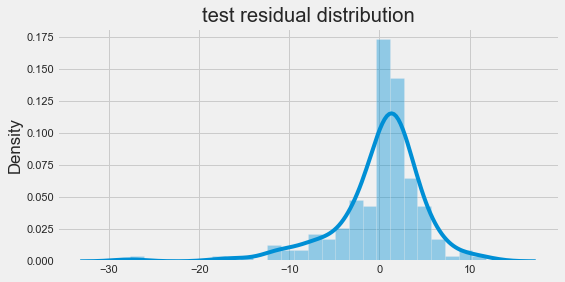

In [155]:
sns.distplot(LREG.predict(X_test)-y_test)
plt.title("test residual distribution")
plt.show()

# Model Validation and Accuracy Calculations1

In [156]:
import sklearn
#from sklearn.model_selection import cross_val_score
print(LREG.score(X_test , y_test))

cv_results = sklearn.model_selection.cross_val_score(LREG, X_train, y_train, cv = 5, scoring = 'r2')
#cv_results = cross_val_score(LREG, X_train, y_train, cv = 5, scoring = 'r2')
msg = "%s: %f (%f)" % ('r2 score', cv_results.mean(),cv_results.std())
print(msg)

0.6620424137002677
r2 score: 0.658153 (0.094172)


# using RandomForrest Regression

In [157]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)


<AxesSubplot:ylabel='Density'>

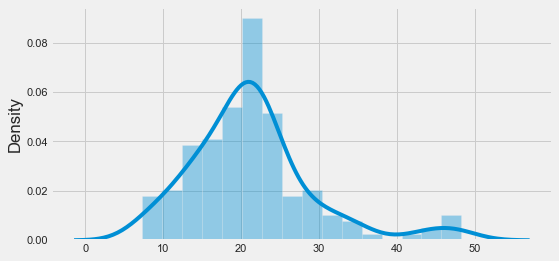

In [158]:
sns.distplot(y_pred)

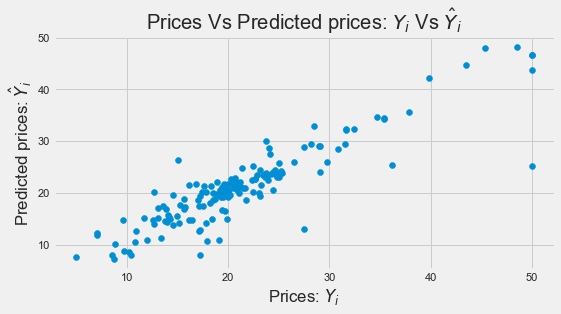

In [159]:

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.show()

In [160]:
print(rf.score(X_test , y_test))

0.8108058487439836


In [161]:
# Measuring Goodness of fit in Training data
rmse = np.sqrt(mean_squared_error(y_train, rf.predict(X_train)))
print("RMSE train",rmse)
print('R2 train',metrics.r2_score(y_train, rf.predict(X_train)))
print("train score", rf.score(X_train , y_train))

print("")
rmse = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))
print("RMSE test",rmse)
print('R2 test',metrics.r2_score(y_test, rf.predict(X_test)))
print("test score", rf.score(X_test , y_test))# displaying the R-squared score

RMSE train 1.4345874569500503
R2 train 0.9765856378475054
train score 0.9765856378475054

RMSE test 3.754656025979083
R2 test 0.8108058487439835
test score 0.8108058487439836


In [162]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

test_score = r2_score(y_test , y_pred)
spearman = spearmanr(y_test, y_pred)
pearson = pearsonr(y_test, y_pred)
print("test R2 Score:" , round(test_score,3))
print("test Spearman Correlation:" ,  round(spearman[0], 3))
print("test Pearson Correlation" , round(pearson[0],3))



test R2 Score: 0.811
test Spearman Correlation: 0.878
test Pearson Correlation 0.901


In [163]:

print("Out of Bag R2 Score" , round(rf.oob_score_,2))

Out of Bag R2 Score 0.82


# Model Validation and Accuracy Calculations2

In [164]:
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
TestingDataResults.head()


##### Model Validation and Accuracy Calculations ##########


,INDUS,RM,TAX,PTRATIO,LSTAT,RAD,CHAS,MEDV,PredictedMEDV
0,0.131598,0.547040,0.208015,0.425532,0.201711,0.173913,0.0,23.6,27.0
1,0.218109,0.612569,0.127863,0.531915,0.049669,0.130435,1.0,32.4,35.0
2,1.000000,0.464074,1.000000,0.797872,0.450883,0.130435,0.0,13.6,14.0
3,0.379399,0.479785,0.225191,0.702128,0.104581,0.130435,0.0,22.8,25.0
4,0.646628,0.524238,0.914122,0.808511,0.428808,1.000000,0.0,16.1,18.0


In [165]:
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', round(Accuracy,3)) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', round(MedianAccuracy,3))


Mean Accuracy on test data: 82.332
Median Accuracy on test data: 88.889


In [166]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [88.30907931 89.06296289 82.27306055 82.329992   86.78601678 88.8508043
 85.01696669 49.20593476 51.97741518 82.31531421]

Final Average Accuracy of the model: 78.61


In [167]:
print("score test", RegModel.score(X_test , y_test))


score test 0.6620424137002677


In [168]:
import sklearn
cv_results = sklearn.model_selection.cross_val_score(RegModel, X_train, y_train, cv = 5, scoring = 'r2')
msg = "%s: %f (%f)" % ('r2 score', cv_results.mean(),cv_results.std())
print(msg)

r2 score: 0.658153 (0.094172)
